In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, confusion_matrix,
cohen_kappa_score, accuracy_score, mean_absolute_error)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import pickle
import yaml

In [2]:
with open("../params.yaml", "r") as file:
    config = yaml.safe_load(file)

In [3]:
data=pd.read_csv(config['data']['CLEAN']+'final_data.csv')
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
7309,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
7310,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
7311,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
7312,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


# 1 Model: Random Forest

In [4]:
# separate categorical and numerical variables
cat_cols = ['power', 'city', 'owner']
num_cols = ['age', 'kms_driven']

# convert categorical variables to numerical using one-hot encoding
X_cat = pd.get_dummies(data[cat_cols], drop_first=True)
X_cat.reset_index(drop=True, inplace=True)

# scale numerical variables
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])
X_num = pd.DataFrame(X_num, columns=num_cols)
X_num.reset_index(drop=True, inplace=True)

# Save the transformer with a pickle file
with open("../Scalers/StandardScaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# merge categorical and numerical variables on index
X = X_cat.join(X_num)

# target variable
y = data['price']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config['train']['test_size'],random_state=config['train']['random_state'])

# initialize a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
with open("../Models/RandomForestRegressor.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# train the model
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# evaluate the model using R^2 score, accuracy and kappa
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Train R^2 score: {round(r2_train, 2)}")
print(f"Test R^2 score: {round(r2_test, 2)}")


Train R^2 score: 0.98
Test R^2 score: 0.89


In [5]:
y_pred = rf_model.predict(X_test)
pred_df = pd.DataFrame(y_pred, columns=['Predictions_random'])
pred_df

,Predictions_random
0,1.207700e+05
1,3.941100e+04
2,2.017400e+04
3,4.753600e+04
4,1.575699e+04
...,...
1458,7.543300e+05
1459,3.928660e+04
1460,1.092963e+05
1461,1.101440e+06


In [6]:
# Evaluate model
# evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {round(r2,2)}")

R^2 score: 0.89


In [7]:
# Random vs Y value

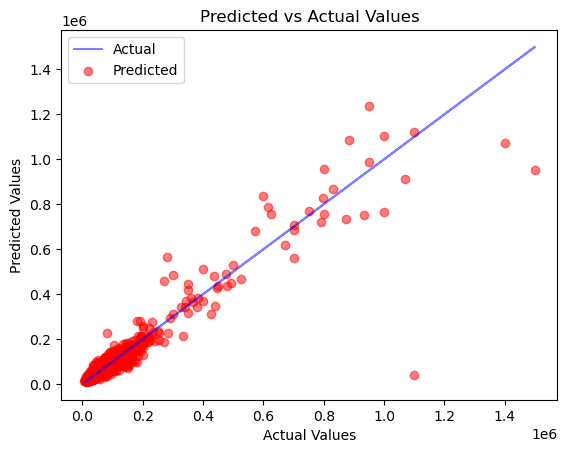

In [8]:
# Create a scatter plot of actual values
fig, ax = plt.subplots()
ax.plot(y_test, y_test, alpha=0.5, c='blue', label='Actual')

# Create a scatter plot of predicted values
ax.scatter(y_test, y_pred, alpha=0.5, c='red', label='Predicted')

# Add labels and title
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add legend
plt.legend()
plt.show()

In [9]:
# mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE: {mae}")

# # calculate mean squared error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")

# # calculate root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")

# calculate mean absolute error (MAE) as a percentage of the mean of actual values
mae = mean_absolute_error(y_test, y_pred)
mae_percent = round(mae / np.mean(y_test) * 100, 0)
print(f"MAE as a percentage of the mean of actual values: {mae_percent}%")

# calculate mean squared error (MSE) as a percentage of the mean of actual values
mse = mean_squared_error(y_test, y_pred)
mse_percent = round(mse / np.mean(y_test) * 100, 0)
print(f"MSE as a percentage of the mean of actual values: {mse_percent}%")

# calculate root mean squared error (RMSE) as a percentage of the mean of actual values
rmse = np.sqrt(mse)
rmse_percent = round(rmse / np.mean(y_test) * 100, 0)
print(f"RMSE as a percentage of the mean of actual values: {rmse_percent}%")


# MAPE ( mean absolute percentage error (MAPE)
mape_test = np.mean((np.abs(y_test - y_pred)/y_test)*100,0)
print(f"MAPE value is : {round(mape_test,2)}%")

MAE as a percentage of the mean of actual values: 18.0%
MSE as a percentage of the mean of actual values: 2104758.0%
RMSE as a percentage of the mean of actual values: 50.0%
MAPE value is : 19.44%


# 2 Model: Linear Regression

In [10]:
# separate categorical and numerical variables
cat_cols = ['power', 'city', 'owner']
#cat_cols = ['power', 'city', 'owner']
num_cols = ['age', 'kms_driven']

# convert categorical variables to numerical using one-hot encoding
X_cat = pd.get_dummies(data[cat_cols], drop_first=True)
X_cat.reset_index(drop=True, inplace=True)

# scale numerical variables
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])
X_num = pd.DataFrame(X_num, columns=num_cols)
X_num.reset_index(drop=True, inplace=True)

# merge categorical and numerical variables on index
X = X_cat.join(X_num)


# target variable
y = data['price']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config['train']['test_size'],random_state=config['train']['random_state'])

# initialize a linear regression model
lr_model = LinearRegression()
with open("../Models/LinearRegression.pkl", "wb") as file:
    pickle.dump(lr_model, file)
# train the model
lr_model.fit(X_train, y_train)

# make predictions on train and test sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# evaluate the model using MSE and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)

r2_train = r2_score(y_train, y_train_pred_lr)
r2_test = r2_score(y_test, y_test_pred_lr)

print(f"Train MSE: {round(mse_train, 2)}")
print(f"Test MSE: {round(mse_test, 2)}")
print(f"Train R^2 score: {round(r2_train, 2)}")
print(f"Test R^2 score: {round(r2_test, 2)}")

Train MSE: 4430359979.88
Test MSE: 1.142144686271681e+27
Train R^2 score: 0.68
Test R^2 score: -7.029414468304563e+16


In [11]:
y_pred_lr = lr_model.predict(X_test)
pred_df_lr = pd.DataFrame(y_pred_lr, columns=['Predictions_lr'])
pred_df_lr

,Predictions_lr
0,119869.245061
1,66950.909202
2,17126.966078
3,83651.883599
4,-22936.478621
...,...
1458,495158.379839
1459,35023.688027
1460,155309.945801
1461,660270.684545


In [12]:
# Linear Regression with y_test

In [34]:
# import matplotlib.pyplot as plt

# # Create a scatter plot of actual values
# fig, ax = plt.subplots()
# ax.plot(y_test, y_test, alpha=0.5, c='blue', label='Actual')

# # Create a scatter plot of predicted values
# ax.scatter(y_test, y_pred_lr, alpha=0.5, c='red', label='Predicted')

# # Add labels and title
# plt.title("Predicted vs Actual Values")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")

# # Add legend
# plt.legend()
# plt.show()


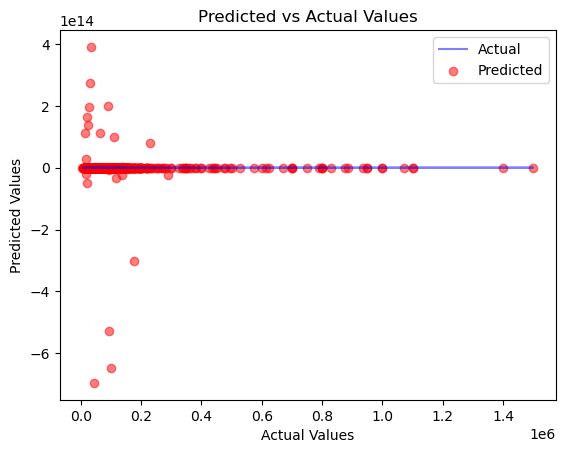

In [35]:
# Create a scatter plot of actual values
fig, ax = plt.subplots()
ax.plot(y_test, y_test, alpha=0.5, c='blue', label='Actual')

# Create a scatter plot of predicted values
ax.scatter(y_test, y_pred_lr, alpha=0.5, c='red', label='Predicted')

# Add labels and title
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add legend
plt.legend()
plt.show()

In [14]:
# fig = px.scatter(grouped_km, x='kms_driven', y='price', title='Average Price by Kms Driven')
# fig.update_xaxes(title_text='Kms Driven')
# fig.update_yaxes(title_text='Price')
# fig.show()

In [15]:
# Evaluate model
# evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred_lr)
print(f"R^2 score: {round(r2, 2)}")

R^2 score: -7.029414468304563e+16


In [16]:
# mae = mean_absolute_error(y_test, y_pred_lr)
# print(f"MAE: {mae}")

# # calculate mean squared error (MSE)
# mse = mean_squared_error(y_test, y_pred_lr)
# print(f"MSE: {mse}")

# # calculate root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")


# calculate mean absolute error (MAE) as a percentage of the mean of actual values
mae = mean_absolute_error(y_test, y_pred_lr)
mae_percent = round(mae / np.mean(y_test) * 100, 2)
print(f"MAE as a percentage of the mean of actual values: {mae_percent}%")

# calculate mean squared error (MSE) as a percentage of the mean of actual values
mse = mean_squared_error(y_test, y_pred_lr)
mse_percent = round(mse / np.mean(y_test) * 100, 2)
print(f"MSE as a percentage of the mean of actual values: {mse_percent}%")

# calculate root mean squared error (RMSE) as a percentage of the mean of actual values
rmse = np.sqrt(mse)
rmse_percent = round(rmse / np.mean(y_test) * 100, 2)
print(f"RMSE as a percentage of the mean of actual values: {rmse_percent}%")

MAE as a percentage of the mean of actual values: 3304252145.41%
MSE as a percentage of the mean of actual values: 1.33961788721986e+24%
RMSE as a percentage of the mean of actual values: 39638788825.3%


# 3 Model: GradientBoostingRegressor

In [17]:
# separate categorical and numerical variables
cat_cols = ['power', 'city', 'owner']
num_cols = ['age', 'kms_driven']

# convert categorical variables to numerical using one-hot encoding
X_cat = pd.get_dummies(data[cat_cols], drop_first=True)
X_cat.reset_index(drop=True, inplace=True)

# scale numerical variables
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])
X_num = pd.DataFrame(X_num, columns=num_cols)
X_num.reset_index(drop=True, inplace=True)

with open("../Scalers/StandardScaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# merge categorical and numerical variables on index
X = X_cat.join(X_num)

# target variable
y = data['price']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config['train']['test_size'],random_state=config['train']['random_state'])

# initialize a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
with open("../Models/GradientBoostingRegressor.pkl", "wb") as file:
    pickle.dump(gb_model, file)
    
# train the model
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# evaluate the model using R^2 score and mean squared error
r2_train = r2_score(y_train, y_train_pred_gb)
r2_test = r2_score(y_test, y_test_pred_gb)

mse_train = mean_squared_error(y_train, y_train_pred_gb)
mse_test = mean_squared_error(y_test, y_test_pred_gb)

print(f"Train R^2 score: {round(r2_train, 2)}")
print(f"Test R^2 score: {round(r2_test, 2)}")
print(f"Train MSE: {round(mse_train, 2)}")
print(f"Test MSE: {round(mse_test, 2)}")

Train R^2 score: 0.93
Test R^2 score: 0.88
Train MSE: 935946705.4
Test MSE: 1902802502.6


In [18]:
y_pred_gbr = gb_model.predict(X_test)
y_pred_gbr = pd.DataFrame(y_pred_gbr, columns=['Predictions_gbr'])
y_pred_gbr

,Predictions_gbr
0,1.325977e+05
1,3.423342e+04
2,2.072678e+04
3,6.817948e+04
4,1.384331e+04
...,...
1458,7.283442e+05
1459,4.252214e+04
1460,1.165838e+05
1461,1.075634e+06


In [19]:
# GradientBoostingRegresso vs y test

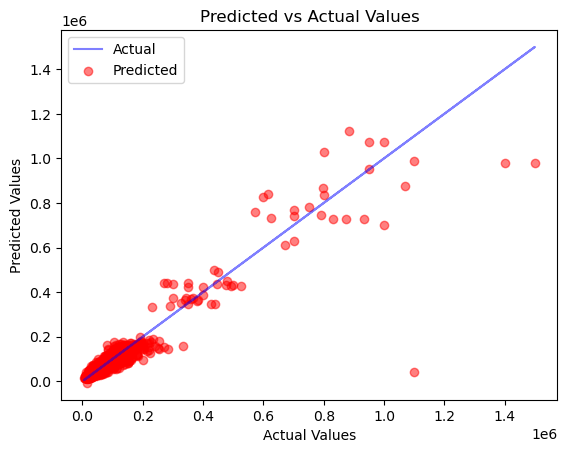

In [20]:
# Create a scatter plot of actual values
fig, ax = plt.subplots()
ax.plot(y_test, y_test, alpha=0.5, c='blue', label='Actual')

# Create a scatter plot of predicted values
ax.scatter(y_test, y_pred_gbr, alpha=0.5, c='red', label='Predicted')

# Add labels and title
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add legend
plt.legend()
plt.show()

In [21]:
# Evaluate model
# evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred_gbr)
print(f"R^2 score: {round(r2, 2)}")

R^2 score: 0.88


In [22]:
# mae = mean_absolute_error(y_test, y_pred_gbr)
# print(f"MAE: {mae}")

# # calculate mean squared error (MSE)
# mse = mean_squared_error(y_test, y_pred_gbr)
# print(f"MSE: {mse}")

# # calculate root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")


# calculate mean absolute error (MAE) as a percentage of the mean of actual values
mae = mean_absolute_error(y_test, y_pred_gbr)
mae_percent = round(mae / np.mean(y_test) * 100, 0)
print(f"MAE as a percentage of the mean of actual values: {mae_percent}%")

# calculate mean squared error (MSE) as a percentage of the mean of actual values
mse = mean_squared_error(y_test, y_pred_gbr)
mse_percent = round(mse / np.mean(y_test) * 100, 0)
print(f"MSE as a percentage of the mean of actual values: {mse_percent}%")

# calculate root mean squared error (RMSE) as a percentage of the mean of actual values
rmse = np.sqrt(mse)
rmse_percent = round(rmse / np.mean(y_test) * 100, 0)
print(f"RMSE as a percentage of the mean of actual values: {rmse_percent}%")

MAE as a percentage of the mean of actual values: 19.0%
MSE as a percentage of the mean of actual values: 2231791.0%
RMSE as a percentage of the mean of actual values: 51.0%
